### If dataset is not avaliable or unable to download run the cell below

#### Set your path

In [ ]:
path = 'data-engineering/Dataset/terencicp/olist.sql'

#converting .sql file to .sqlite file

import sqlite3
import os

def sql_to_sqlite(path):
    sqlite_file = path.replace('.sql', '.sqlite')
    try:
        os.remove(sqlite_file)
    except:
        pass
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()
    with open(path, 'r') as f:
        sql = f.read()
        c.executescript(sql)
    conn.commit()
    conn.close()
    return sqlite_file

sqlite_file = sql_to_sqlite(path)
print(sqlite_file)

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import col
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import lit
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime

import shutil
import os
path = r'C:\Users\c2tlha\Desktop\data-engineering\Dataset\terencicp\olist.sqlite'

#loading the sqlite file
conn = sqlite3.connect(path)

#load the sql file in spark
spark = SparkSession.builder.master("local").appName("olist").getOrCreate()

In [2]:
path = r'C:\Users\c2tlha\Desktop\data-engineering\Dataset\terencicp\olist.sqlite'

#loading the sqlite file
conn = sqlite3.connect(path)

#getting table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])


#export the sqlite file to a sql file
with open('olist.sql', 'w') as f:
    #saving in Dataset Directory
    for line in conn.iterdump():
        f.write('%s\n' % line)

# Close the connection
conn.close()

#move the sql file to the Dataset Directory and if already exists, delete  it and the move

if os.path.exists(r'C:\Users\c2tlha\Desktop\data-engineering\Dataset\terencicp\olist.sql'):
    os.remove(r'C:\Users\c2tlha\Desktop\data-engineering\Dataset\terencicp\olist.sql')

shutil.move('olist.sql', r'C:\Users\c2tlha\Desktop\data-engineering\Dataset\terencicp\olist.sql')



product_category_name_translation
sellers
customers
geolocation
order_items
order_payments
order_reviews
orders
products
leads_qualified
leads_closed


'C:\\Users\\c2tlha\\Desktop\\data-engineering\\Dataset\\terencicp\\olist.sql'

In [3]:
path = r'C:\Users\c2tlha\Desktop\data-engineering\Dataset\terencicp\olist.sqlite'

#load the sql file in spark
spark = SparkSession.builder.master("local").appName("olist").getOrCreate()

conn = sqlite3.connect(path)

#getting table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print('The tables in the database are: ')
for table in tables:
    print(table[0])

The tables in the database are: 
product_category_name_translation
sellers
customers
geolocation
order_items
order_payments
order_reviews
orders
products
leads_qualified
leads_closed


In [4]:
query = "SELECT * FROM customers"
pd_df = pd.read_sql_query(query, conn)
spark_df = spark.createDataFrame(pd_df)

spark_df.show()


+--------------------+--------------------+------------------------+--------------------+--------------+
|         customer_id|  customer_unique_id|customer_zip_code_prefix|       customer_city|customer_state|
+--------------------+--------------------+------------------------+--------------------+--------------+
|06b8999e2fba1a1fb...|861eff4711a542e4b...|                   14409|              franca|            SP|
|18955e83d337fd6b2...|290c77bc529b7ac93...|                    9790|sao bernardo do c...|            SP|
|4e7b3e00288586ebd...|060e732b5b29e8181...|                    1151|           sao paulo|            SP|
|b2b6027bc5c5109e5...|259dac757896d24d7...|                    8775|     mogi das cruzes|            SP|
|4f2d8ab171c80ec83...|345ecd01c38d18a90...|                   13056|            campinas|            SP|
|879864dab9bc30475...|4c93744516667ad3b...|                   89254|      jaragua do sul|            SC|
|fd826e7cf63160e53...|addec96d2e059c80c...|            

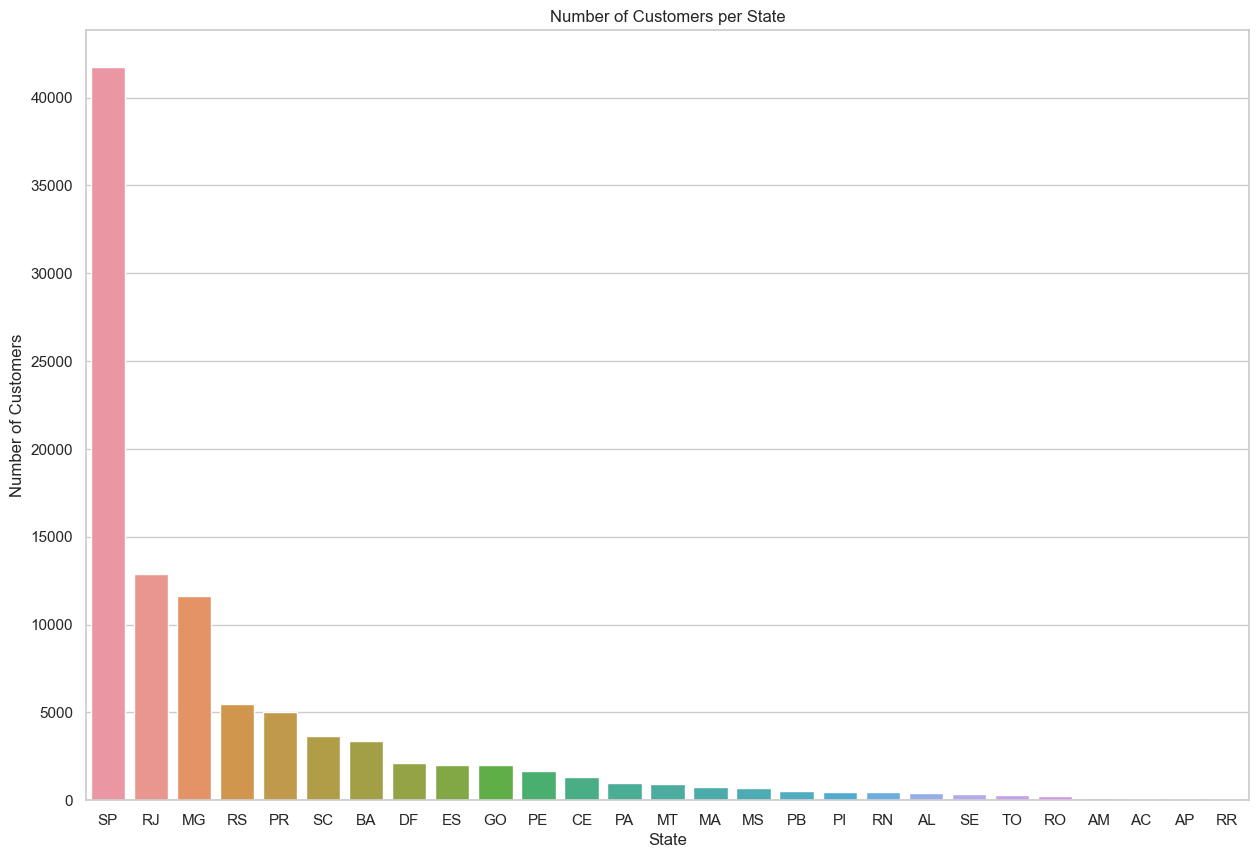

In [5]:
#visualizing the data
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.countplot(x='customer_state', data=pd_df, order=pd_df['customer_state'].value_counts().index)
plt.title('Number of Customers per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

In [6]:
query = "SELECT * FROM geolocation"
pd_df = pd.read_sql_query(query, conn)
spark_df = spark.createDataFrame(pd_df)

spark_df.show()
spark_df.count()

+---------------------------+-------------------+-------------------+----------------+-----------------+
|geolocation_zip_code_prefix|    geolocation_lat|    geolocation_lng|geolocation_city|geolocation_state|
+---------------------------+-------------------+-------------------+----------------+-----------------+
|                       1037| -23.54562128115268| -46.63929204800168|       sao paulo|               SP|
|                       1046| -23.54608112703553| -46.64482029837157|       sao paulo|               SP|
|                       1046| -23.54612896641469| -46.64295148361138|       sao paulo|               SP|
|                       1041|  -23.5443921648681| -46.63949930627844|       sao paulo|               SP|
|                       1035|-23.541577961711493| -46.64160722329613|       sao paulo|               SP|
|                       1012|-23.547762303364262| -46.63536053788448|       são paulo|               SP|
|                       1047| -23.54627311241268| -46.6

1000163

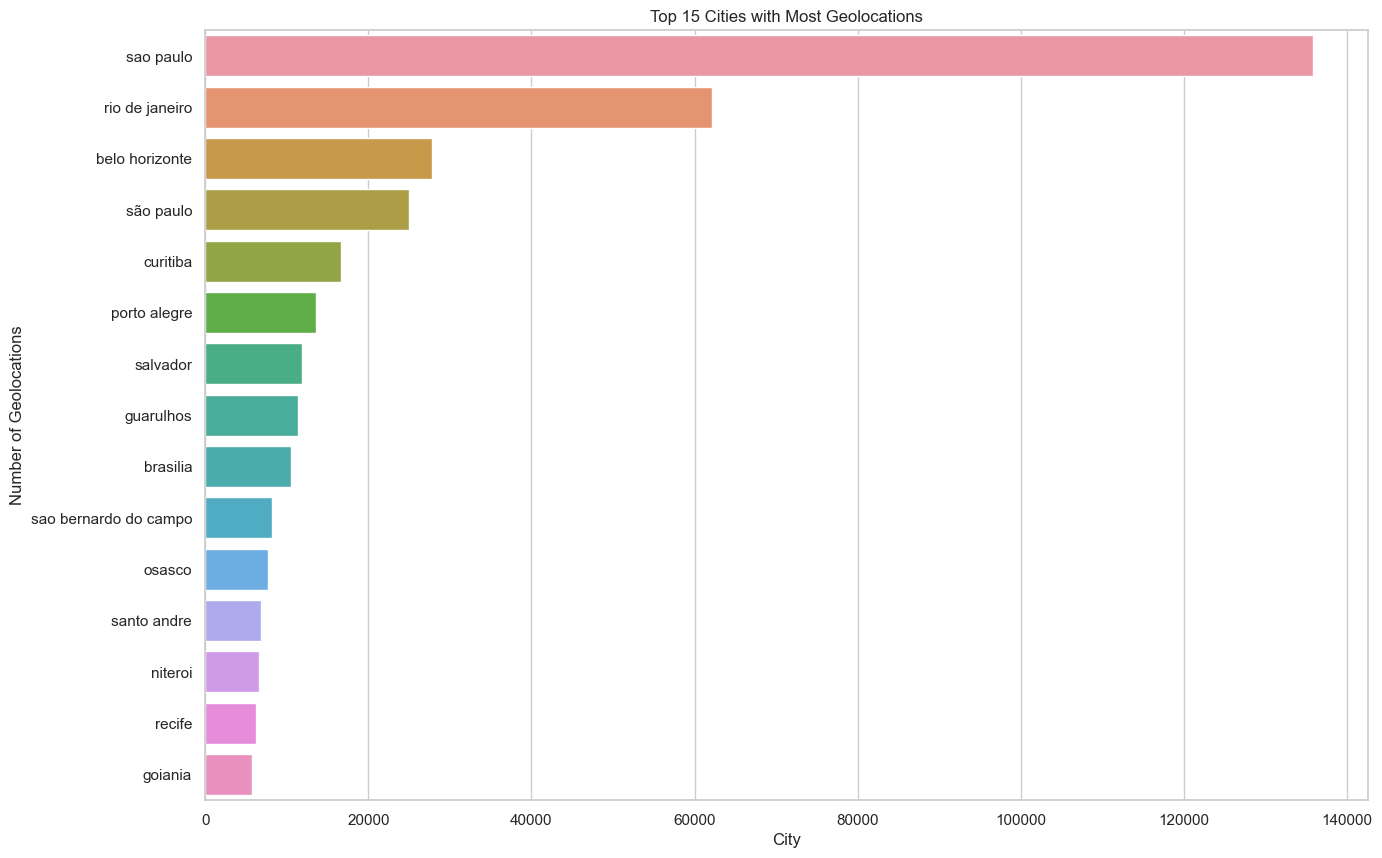

In [7]:
city_counts = pd_df['geolocation_city'].value_counts()

#now plotting the data

plt.figure(figsize=(15, 10))
#making countplot horizontal
sns.countplot(y='geolocation_city', data=pd_df, order=city_counts.iloc[:15].index)
plt.title('Top 15 Cities with Most Geolocations')
plt.xlabel('City')
plt.ylabel('Number of Geolocations')
plt.show()


In [8]:
query = "SELECT * FROM sellers"
pd_df = pd.read_sql_query(query, conn)
spark_df = spark.createDataFrame(pd_df)

spark_df.show()

+--------------------+----------------------+-----------------+------------+
|           seller_id|seller_zip_code_prefix|      seller_city|seller_state|
+--------------------+----------------------+-----------------+------------+
|3442f8959a84dea7e...|                 13023|         campinas|          SP|
|d1b65fc7debc3361e...|                 13844|       mogi guacu|          SP|
|ce3ad9de960102d06...|                 20031|   rio de janeiro|          RJ|
|c0f3eea2e14555b6f...|                  4195|        sao paulo|          SP|
|51a04a8a6bdcb23de...|                 12914|braganca paulista|          SP|
|c240c4061717ac180...|                 20920|   rio de janeiro|          RJ|
|e49c26c3edfa46d22...|                 55325|           brejao|          PE|
|1b938a7ec6ac5061a...|                 16304|        penapolis|          SP|
|768a86e36ad6aae3d...|                  1529|        sao paulo|          SP|
|ccc4bbb5f32a6ab2b...|                 80310|         curitiba|          PR|

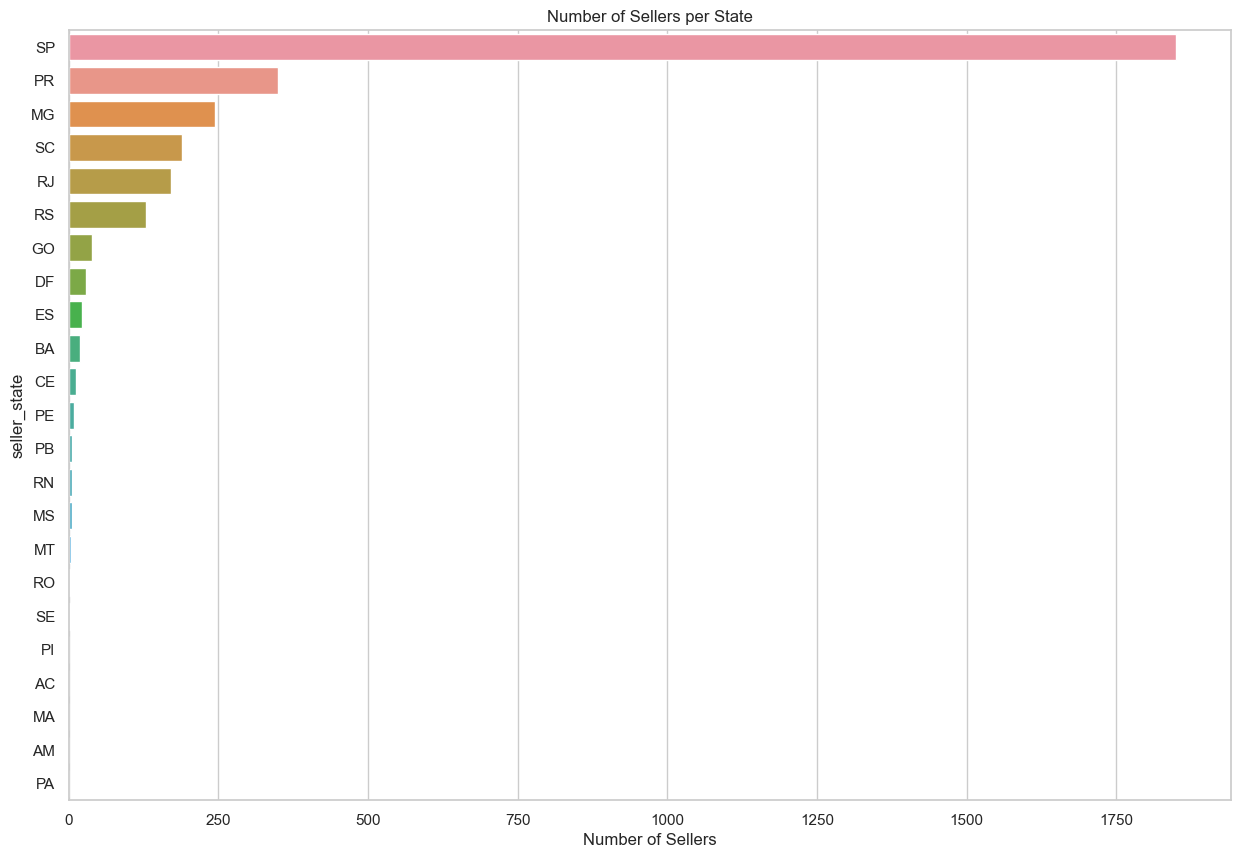

In [9]:
#horizontal chat visualizing most sellers from which state
plt.figure(figsize=(15, 10))

sns.countplot(y='seller_state', data=pd_df, order=pd_df['seller_state'].value_counts().index)
plt.title('Number of Sellers per State')
plt.xlabel('Number of Sellers')

plt.show()

In [10]:
query = "SELECT * FROM products"
pd_df = pd.read_sql_query(query, conn)
spark_df = spark.createDataFrame(pd_df)

spark_df.show()


+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|          product_id|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|
+--------------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|1e9e8ef04dbcff454...|           perfumaria|               40.0|                     287.0|               1.0|           225.0|             16.0|             10.0|            14.0|
|3aa071139cb16b67c...|                artes|               44.0|                     276.0|               1.0|          1000.0|             30.0|             18.0|            20.0|
|96bd76ec8810374ed...|        esporte_lazer|               46.0|                     250.0|    

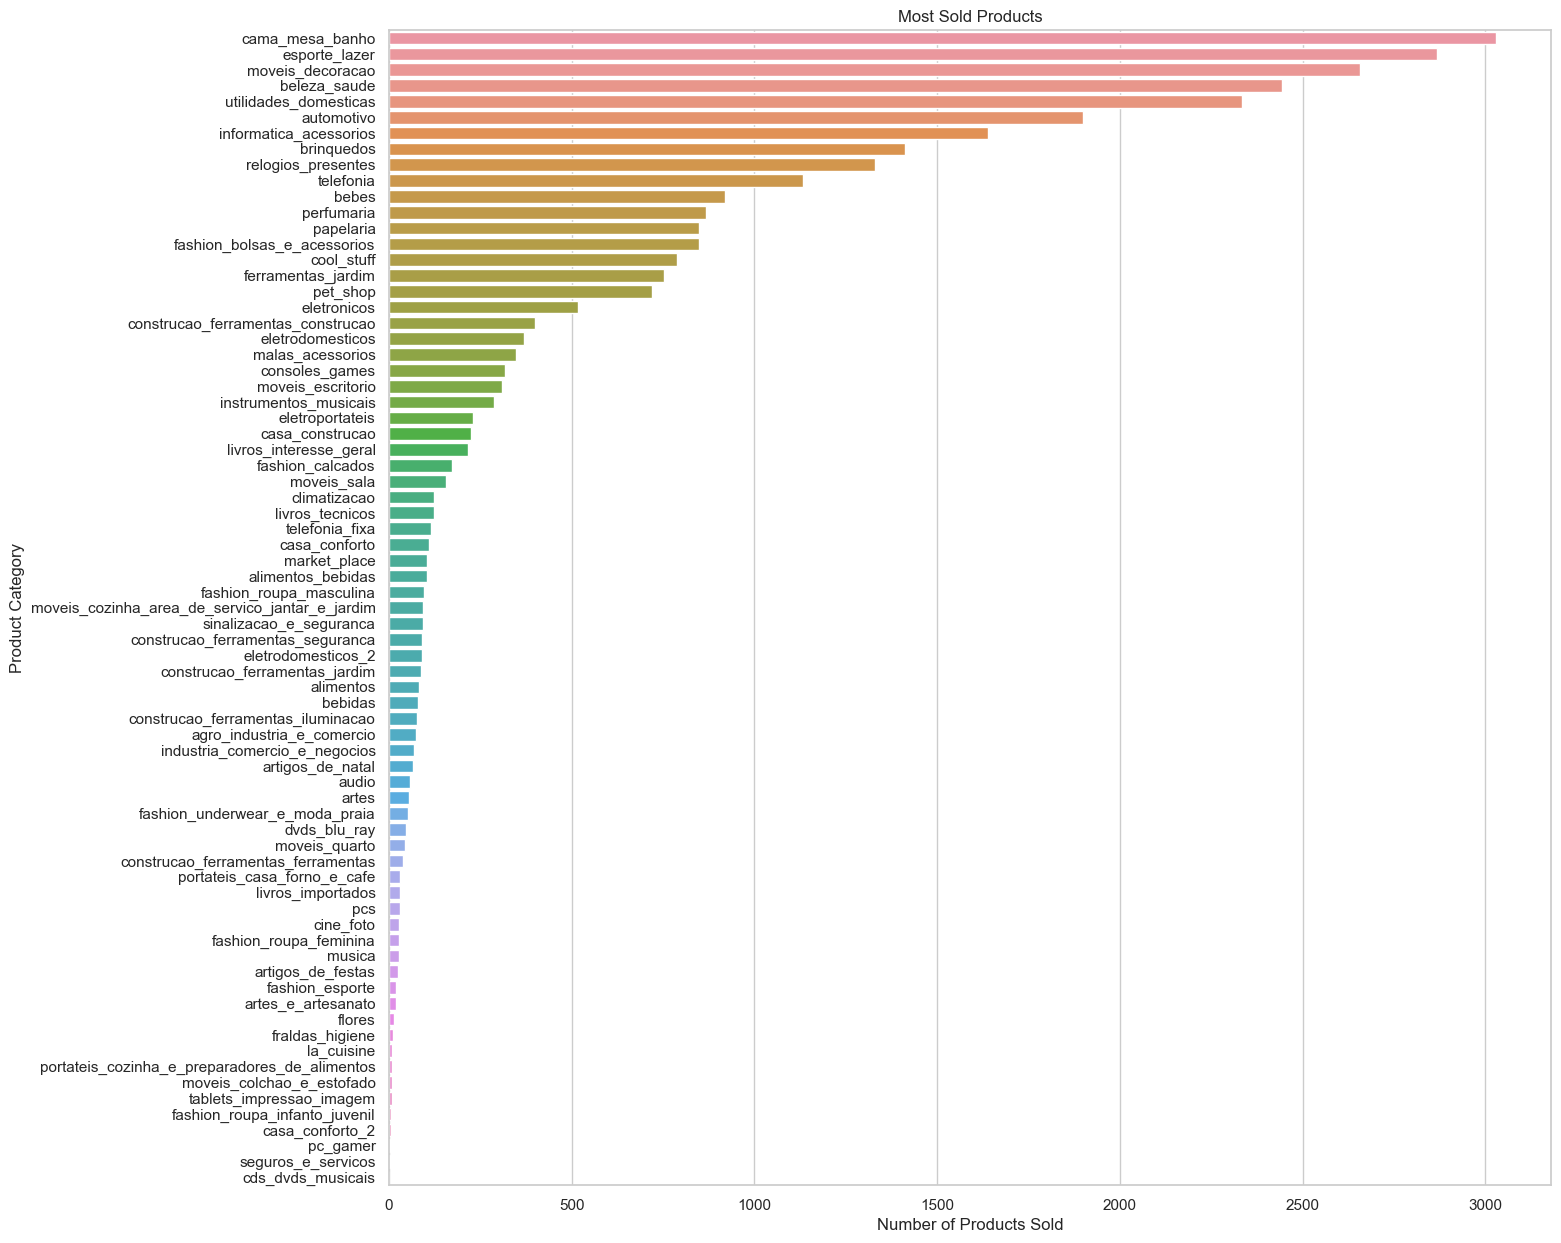

In [11]:
#plotting most sold products
plt.figure(figsize=(15, 15))
sns.countplot(y='product_category_name', data=pd_df, order=pd_df['product_category_name'].value_counts().index)
plt.title('Most Sold Products')
plt.xlabel('Number of Products Sold')
plt.ylabel('Product Category')
plt.show()


In [12]:
query = "SELECT * FROM order_payments"

pd_df = pd.read_sql_query(query, conn)
spark_df = spark.createDataFrame(pd_df)

#droping the rows from payment_type column where the value is not_defined in payment_counts 
pd_df = pd_df[pd_df['payment_type'] != 'not_defined']

spark_df.show()

+--------------------+------------------+------------+--------------------+-------------+
|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+--------------------+------------------+------------+--------------------+-------------+
|b81ef226f3fe1789b...|                 1| credit_card|                   8|        99.33|
|a9810da82917af2d9...|                 1| credit_card|                   1|        24.39|
|25e8ea4e93396b6fa...|                 1| credit_card|                   1|        65.71|
|ba78997921bbcdc13...|                 1| credit_card|                   8|       107.78|
|42fdf880ba16b47b5...|                 1| credit_card|                   2|       128.45|
|298fcdf1f73eb413e...|                 1| credit_card|                   2|        96.12|
|771ee386b001f0620...|                 1| credit_card|                   1|        81.16|
|3d7239c394a212faa...|                 1| credit_card|                   3|        51.84|
|1f78449c8

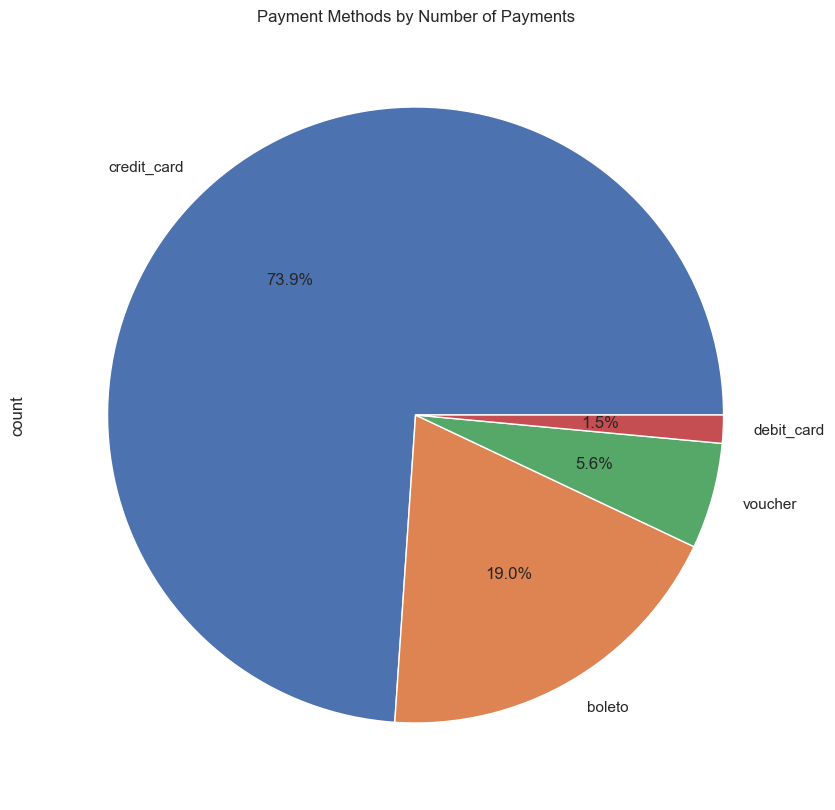

In [13]:


#plotting the payment methods by number of payments using pie chart
plt.figure(figsize=(15, 10))
payment_method = pd_df['payment_type'].value_counts()
payment_method.plot.pie(autopct='%1.1f%%')
plt.title('Payment Methods by Number of Payments')
plt.show()

In [14]:
query = "SELECT * FROM product_category_name_translation"

pd_df = pd.read_sql_query(query, conn
                            )
spark_df = spark.createDataFrame(pd_df)

spark_df.show(spark_df.count())

+---------------------+-----------------------------+
|product_category_name|product_category_name_english|
+---------------------+-----------------------------+
|         beleza_saude|                health_beauty|
| informatica_acess...|         computers_accesso...|
|           automotivo|                         auto|
|      cama_mesa_banho|               bed_bath_table|
|     moveis_decoracao|              furniture_decor|
|        esporte_lazer|               sports_leisure|
|           perfumaria|                    perfumery|
| utilidades_domest...|                   housewares|
|            telefonia|                    telephony|
|   relogios_presentes|                watches_gifts|
|    alimentos_bebidas|                   food_drink|
|                bebes|                         baby|
|            papelaria|                   stationery|
| tablets_impressao...|         tablets_printing_...|
|           brinquedos|                         toys|
|       telefonia_fixa|     

In [15]:

from pyspark.sql.functions import col
query = "SELECT * FROM product_category_name_translation"
query2 = "SELECT * FROM products"
pd_df = pd.read_sql_query(query, conn)
spark_df = spark.createDataFrame(pd_df)
#product_category_name, product_category_name_english 
pd_df2 = pd.read_sql_query(query2, conn)
spark_df2 = spark.createDataFrame(pd_df2)

#final df having product_category_name replaced by product_category_name_english and also having all other cols
final_df = spark_df.join(spark_df2, spark_df.product_category_name == spark_df2.product_category_name, 'inner') \
             .drop(spark_df.product_category_name) \
             .withColumnRenamed('product_category_name_english', 'product_category_name_english')

final_df = final_df.drop('product_category_name')
final_df.show(final_df.count())

final_df = final_df.toPandas()



+-----------------------------+--------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|product_category_name_english|          product_id|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|
+-----------------------------+--------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+
|                    computers|1e5428c428e0f783a...|               55.0|                    1067.0|               1.0|         12000.0|             27.0|             50.0|            53.0|
|                    computers|9aedf557945e816d4...|               55.0|                    3610.0|               4.0|          2400.0|             16.0|             31.0|            39.0|
|                    computers|a04087ab6a96ffa04...|   

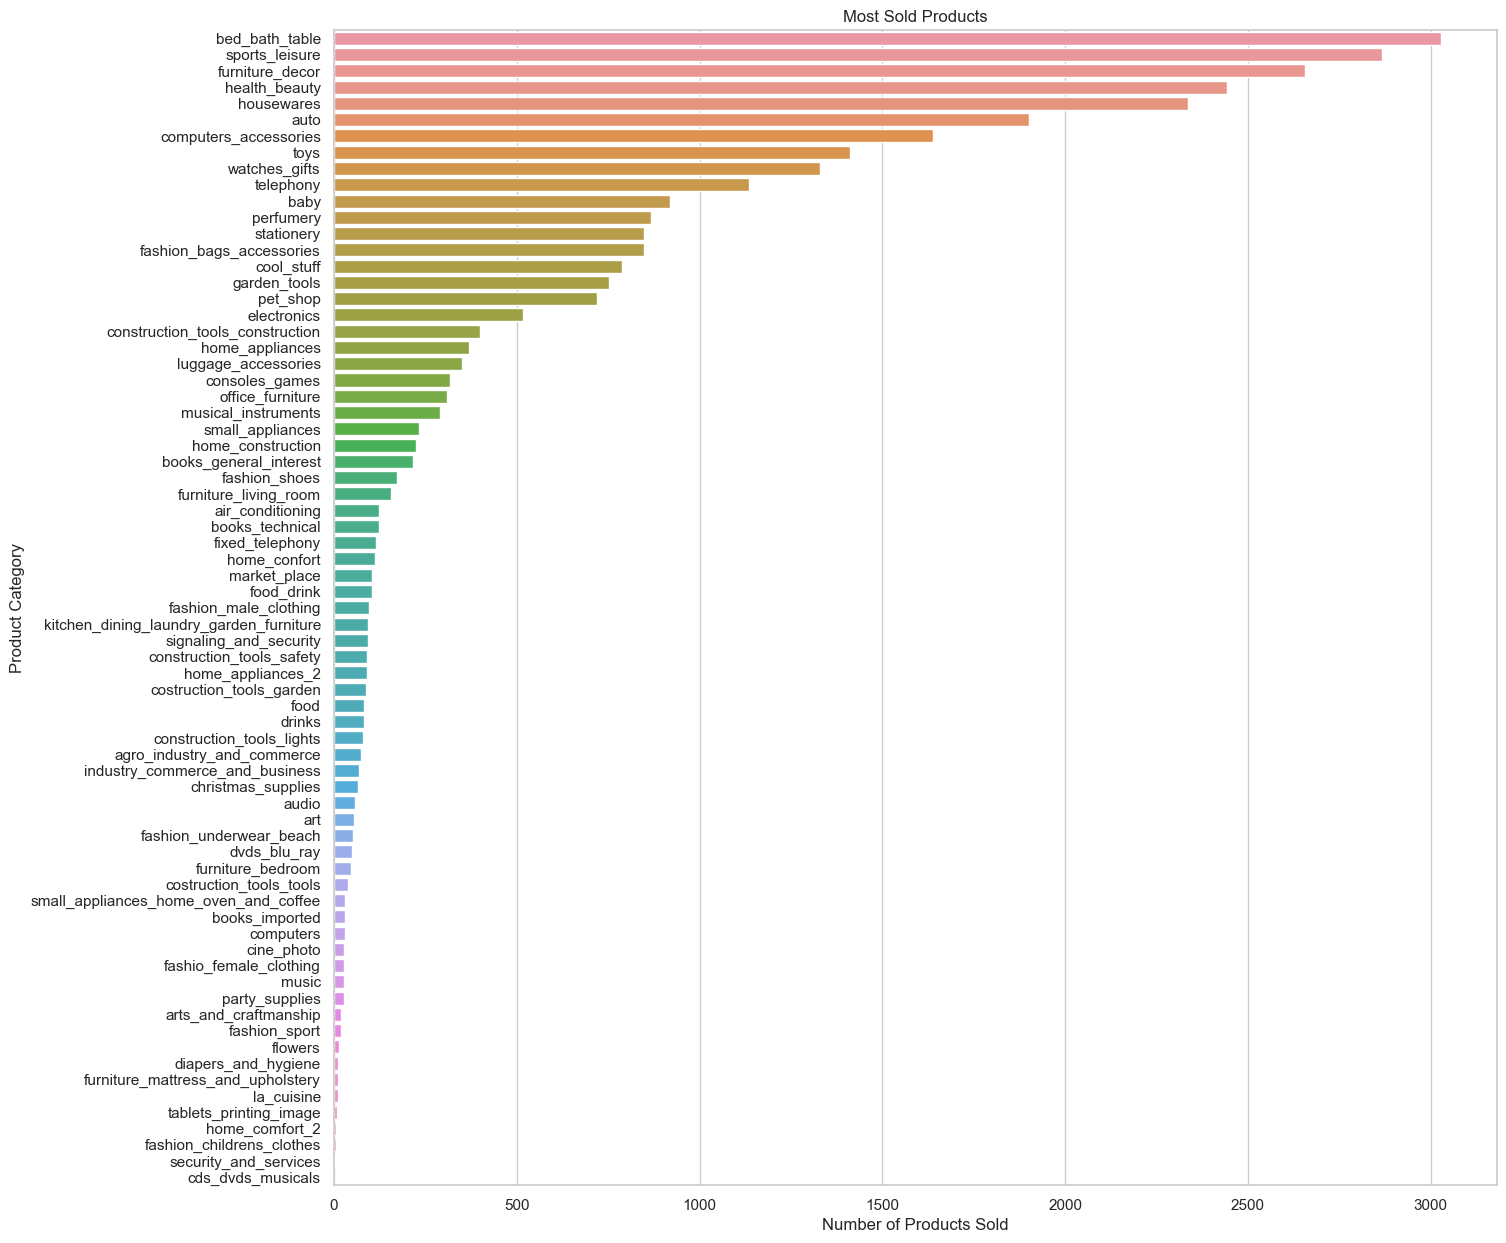

In [16]:
#plotting most sold products
plt.figure(figsize=(15, 15))
sns.countplot(y='product_category_name_english', data=final_df, order=final_df['product_category_name_english'].value_counts().index)
plt.title('Most Sold Products')
plt.xlabel('Number of Products Sold')
plt.ylabel('Product Category')
plt.show()
